# Part II - Big Pharma Stock Data Exploration
## by Abdulhaq Adetunji Salako

## Introduction

> In this investigation, I would like to examine the features of restock that could affect or predict a stock demands . Beside my main feature of time series data, the stock demand, I am looking to see how certain variables might affect the stock demand's relationship with another variable. For example, some relationships that I examined are date vs stock demand. 

## Dataset Overview

> The 1,048,575 purchases in this dataset have an total of 3 variables per, including date, product id, and stock demand. Prosper makes the dataset available by  Udacity.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates as mdates

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")


import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn import preprocessing

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('pharmaceutical-sales-demand.csv') 
# Converting Date from String to datetime64
df['Date'] = pd.to_datetime(df['Date'])
# change all features naming conventions 
df = df.rename(columns={'Product ID': 'product_id','Date':'date' ,'Stock Demand': 'stock_demand'})

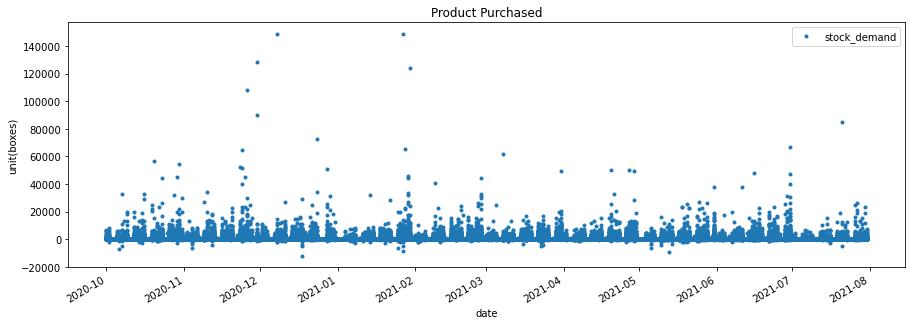

In [3]:
df.plot(x="date",y="stock_demand" ,style='.',
        figsize=(15, 5),
        title='Product Purchased')
plt.ylabel('unit(boxes)')
plt.show()

In [4]:
#Date Features
def date_features(df):
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['day_of_year'] = df['date'].dt.dayofyear
    df['day_of_week'] = df['date'].dt.dayofweek
    df['week_of_year'] = df['date'].dt.isocalendar().week
    
    # Drop date
    df.drop('date', axis=1, inplace=True)
    
    return df

df = date_features(df)
df_stock = df.copy()

Text(0.5, 0, 'Stock Demand')

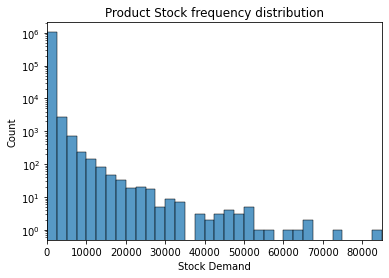

In [5]:
bin_edges = np.arange(0,df_stock['stock_demand'].max()+5000,2500)
sns.histplot(data=df_stock,x='stock_demand',bins=bin_edges).set(title='Product Stock frequency distribution');
plt.yscale('log')
plt.xlim(0,85000)
plt.xlabel('Stock Demand')

Text(0, 0.5, 'unit(boxes)')

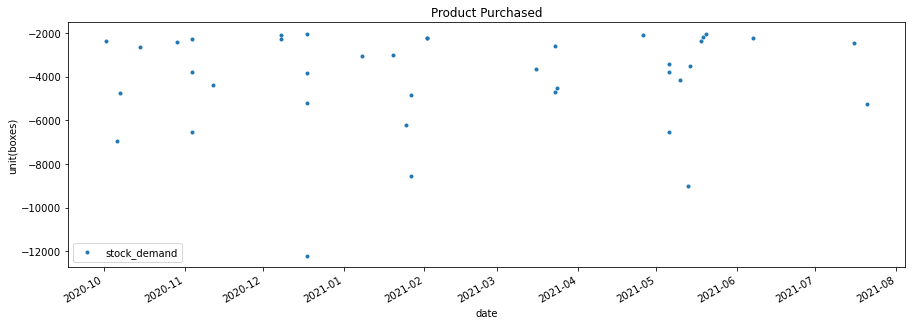

In [6]:
df_stock['date'] =  pd.to_datetime(df_stock[["year","month","day"]])
df_stock.query('stock_demand < -2000').plot(x="date",y="stock_demand" ,style='.',
        figsize=(15, 5),
        title='Product Purchased')
plt.ylabel('unit(boxes)')


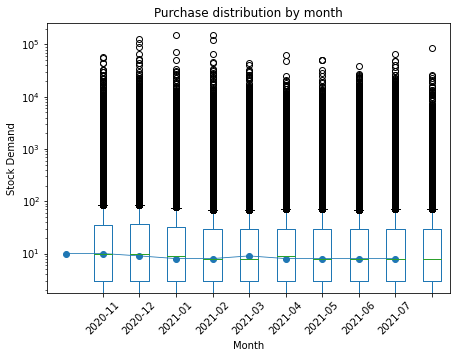

In [7]:
# Boxplot for annual seasonality
df_stock['y_m'] = pd.to_datetime(df_stock[["year","month","day"]])
df_stock['y_m']  = df_stock['y_m'].dt.strftime('%Y-%m')

fig, ax = plt.subplots(figsize=(7, 5))
df_stock.boxplot(column='stock_demand', by='y_m', ax=ax)
df_stock.groupby('y_m')['stock_demand'].median().plot(style='o-', linewidth=0.8, ax=ax)

ax.set_yscale('log')
# plt.yticks(ticks, labels);
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.set_ylabel('Stock Demand')
ax.set_xlabel('Month')
ax.set_title('Purchase distribution by month')
fig.suptitle('');

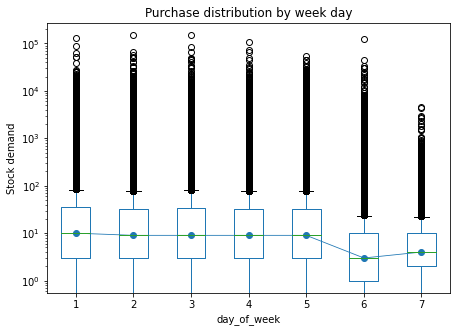

In [8]:
# Boxplot for weekly seasonality
fig, ax = plt.subplots(figsize=(7, 5))
df_stock['day_of_week'] = df_stock.day_of_week + 1
df_stock.boxplot(column='stock_demand', by='day_of_week', ax=ax)
df_stock.groupby('day_of_week')['stock_demand'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Stock demand')
ax.set_title('Purchase distribution by week day')
ax.set_yscale('log')
fig.suptitle('');

In [9]:
df_stock['daily_avg']  = df_stock.groupby(['product_id','day_of_week'])['stock_demand'].transform('mean')
df_stock['monthly_avg'] = df_stock.groupby(['product_id','month'])['stock_demand'].transform('mean')

### Numerica Variables Pairwise Correlation


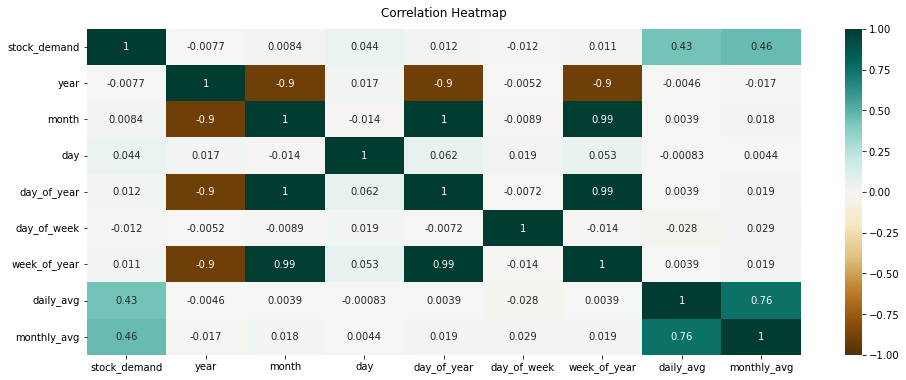

In [10]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_stock.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [11]:
df_stock['date'] = pd.to_datetime(df_stock[["year","month","day"]])
train_df = df_stock.loc[(df_stock['date'] < '2021-05-01')]
test_df = df_stock.loc[(df_stock['date'] >= '2021-05-01')]

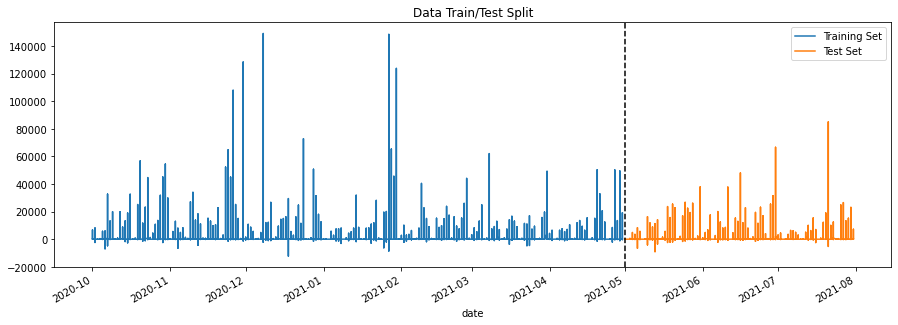

In [12]:
fig, ax = plt.subplots(figsize=(15, 5))
train_df.plot(x='date' , y='stock_demand' ,ax=ax, label='Training Set', title='Data Train/Test Split')
test_df.plot( x='date' , y='stock_demand' ,ax=ax, label='Test Set')
ax.axvline('2021-05-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [ ]:
!jupyter nbconvert Big_Pharma_Exploration.ipynb --to slides --post serve --no-input --no-prompt